In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

pd.set_option('display.max_columns', 500)

df = pd.read_csv('../Data/DC_Properties.csv')
df_clean = pd.read_csv('../Data/Properties_clean.csv',index_col=0)

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9,13,16,24,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [163]:
import shapefile as shp
def shp_to_df(sf):
    # Extract labels and data
    fields = [x[0] for x in sf.fields[1:]] # Column values
    records = sf.records() # data for dataframe
    shape_data = [x.points for x in sf.shapes()]

    # Create dataframe with values
    df_geo = pd.DataFrame(columns=fields, data=records)
    df_geo['coords'] = shape_data
    
    return df_geo
# First plot: All districts with number inside

    
Shp_path = '../Data/Census_Tracts_in_2010.shp'
sf = shp.Reader(Shp_path)
df_geo = shp_to_df(sf)
df_geo = df_geo.loc[:,['TRACT','coords']]
df_geo.TRACT = df_geo.TRACT.astype(float)
df_geo.columns = ['CENSUS_TRACT','COORDS']

# Narrative requirements

- Scatterplot
- Shapefile map with colors
- Histogram


# Narrative overview

## Slide 1
- the first slide should be something that demonstrates the abundance of the data we have available. 

> This could be a scatter plot, perhaps with the size of the appartment as the size of the circle and then some categorical variable for the colors. So brick houses would be red, and aluminium corregated sheets would be grey, etc.

> Here we'd have a discussion about the abundance of information required to make an educated desicion about buying property
> (As side by side plots) the right could be just a histogram of prices aggregated by district or some other fairly low-categorical count. 

##### Text:
Welcome to our data visualization project for the course *02806 Social data analysis and visualization*
        

The purpose is to communicate how various property characteristics play a part when a price is set. Our goal for the  user is to provide a nice visualization that can explain how different features affect the pricing of real estate. We want the user to consider and be aware of different aspects of a property when looking to buy.
  

## Slide 2
- The second slide contains information to give the reader and overview of the price range and distribution around the city
> On the left is a map with colored 
> (As side by side plots) If we have a map on the left

##### Text:
Let's begin our exploration by getting an overview of the price distribution in the capital. 

On the left you can see the median price of an appartment by each district and on the right you see the overall distribution of price in the city. Click on one of the cencus districts to see the price distribution compared to the rest of the city. 


## Slide 3


##### Text:
We've seen that the distribution of price is highly regional, but there is more to the pricing than meets the eye. 

If a neighbourhood has houses that are twice as expensive but four times as big, then you'd be getting a lot less for your money, even if you are spending less.

Let's see if there is a diference in the price per square foot for the apartments of the city. 

We see that neighbourhoods X and Y now look a lot less expensive compared to before. 


## Slide 4
We know that size isn't everything ;) it also matters how many rooms there are in the apartments. Here you can look at how the price of apartments differs by the number of rooms in each neighbourhood. 

You can pick if you want to look at the price per square foot or just the overall price. 
Select a number of rooms to see the distribution of price (or price per square foot) in each neigbourhood.


## Slide 5
We've seen that that size and number of rooms can affect the price of an appartment.

As a family man, I want to know which neighbourhood has the best prices for my family, and I suspect that other families would want to know the same. 

Let's see which neighbourhood has the best price (or price per square foot) for a given size family.


## Slide 6







In [29]:
# BOKEH IMPORTS 
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure

from bokeh.models import CategoricalColorMapper, HoverTool, ColumnDataSource, Panel
from bokeh.models import NumeralTickFormatter,Label,ColumnDataSource
from bokeh.models.widgets import CheckboxGroup, Slider, RangeSlider, Tabs, TableColumn, DataTable

from bokeh.layouts import column, row, WidgetBox
from bokeh.palettes import Category20_16, inferno

from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application


In [30]:
def style(p):
    # Title 
    p.title.align = 'center'
    p.title.text_font_size = '20pt'
    p.title.text_font = 'serif'

    # Axis titles
    p.xaxis.axis_label_text_font_size = '14pt'
    p.xaxis.axis_label_text_font_style = 'bold'
    p.yaxis.axis_label_text_font_size = '14pt'
    p.yaxis.axis_label_text_font_style = 'bold'

    # Tick labels
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'

    return p

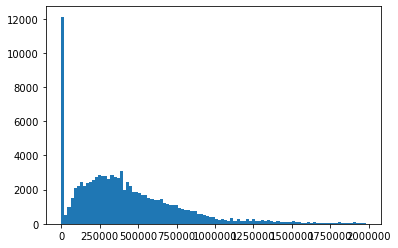

In [31]:
## Slide 1 (the first slide should be something that demonstrates the abundance of the data we have available)

plt.hist(df_clean.PRICE,bins=np.arange(0,2_000_000,20_000))
plt.show()

In [35]:

arr_hist, edges = np.histogram(df['PRICE'],
                               bins = 'auto',
                               range=[0,df.PRICE.quantile(0.75)])

# # Put the information in a dataframe
prices = pd.DataFrame({'property_count': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})
# Add a column showing the extent of each interval

src = ColumnDataSource(prices)

p = figure(plot_height = 600, plot_width = 700, 
           title = 'Histogram of Real Estate prices in Washinton D.C.',
           x_axis_label = 'Price ($)', 
           y_axis_label = 'Number of properties')

# Add a quad glyph with source this time
p.quad(bottom=0, top='property_count',
       left='left', right='right',
       source=src,
       fill_color='red', line_color='black', fill_alpha = 0.75,
       hover_fill_alpha = 1.0, hover_fill_color = 'navy')


p.xaxis[0].formatter = NumeralTickFormatter(format="$0")

# style the plot
p = style(p)

# add the hovertool
# Hover tool referring to our own data field using @ 
h_tool = HoverTool(tooltips = [('Number Of Properties', '@property_count'),
                               ('Price Interval', '@p_interval')])
p.add_tools(h_tool)

# Show the plot
show(p)

In [33]:
available_neighbourhoods = list(df.ASSESSMENT_NBHD.dropna().unique())

In [34]:
def make_tab(doc):
    def make_dataset(neighbourhood_list, range_start = 0, range_end = 10000000, bin_width = 50):
        by_neighbourhood = pd.DataFrame(columns = ['proportion', 'left', 'right'
                                                  'f_proportion', 'f_interval',
                                                  'name', 'color'])
        range_extent = range_end - range_start
        
        # Iterate through all neighbourhoods
        for i, neighbourhood_name in enumerate(neighbourhood_list):
            # subset relevant to the neighbourhood
            subset = df[df.ASSESSMENT_NBHD == neighbourhood_name]
            
            # create histogram with specified bins and range
            price_hist, edges = np.histogram(subset['PRICE'],
                                          bins = bin_width,
                                          range = [range_start, range_end])
            
            # divide the counts by the total to get a proportion and create df
            price_df = pd.DataFrame({'proportion': price_hist / np.sum(price_hist),
                                    'left': edges[:-1], 'right': edges[1:]})
            
            # format the proportion for display
            price_df['f_proportion'] = ['%.2f' % proportion for proportion in price_df['proportion']]
            
            # format the interval for display
            price_df['f_interval'] = ['$%d to $%d' % (left, right) for left, right in zip(price_df['left'], price_df['right'])]
            
            # assign the neighbourhood for labels
            price_df['name'] = neighbourhood_name
            
            # color each neighbourhood differentely
            price_df['color'] = inferno(len(neighbourhood_list))[i]
            
            # add to overall dataframe
            by_neighbourhood = by_neighbourhood.append(price_df)
            
        # overall dataframe
        by_neighbourhood = by_neighbourhood.sort_values(['name', 'left'])
        
        # convert df to columndatasource
        return ColumnDataSource(by_neighbourhood)
    # The function should takes in a columndatasource and returns a bokeh plot object
    def make_plot(src):
            # Blank plot with correct labels
            p = figure(plot_width = 700, plot_height = 700, 
                      title = 'Histogram of Real Estate Prices by Neighbourhood',
                      x_axis_label = 'Price ($)', y_axis_label = 'Proportion')

            # Quad glyphs to create a histogram
            p.quad(source = src, bottom = 0, top = 'proportion', left = 'left', right = 'right',
                   color = 'color', fill_alpha = 0.7, hover_fill_color = 'color', legend = 'name',
                   hover_fill_alpha = 1.0, line_color = 'black')

            # Hover tool with vline mode
            hover = HoverTool(tooltips=[('Neighbourhood', '@name'), 
                                        ('Price', '@f_interval'),
                                        ('Proportion', '@f_proportion')],
                              mode='vline')

            p.xaxis[0].formatter = NumeralTickFormatter(format="$0")
            p.add_tools(hover)
            
            p.add_layout(mytext)

            # Styling
            p = style(p)

            return p 

        # Update function takes three default parameters
    def update(attr, old, new):
        # Get the list of selected neighbourhoods from the graph
        neighbourhoods_to_plot = [neighbourhood_selection.labels[i] for i in 
                            neighbourhood_selection.active]
        # Make a new dataset based on the selected neighbourhoods and the 
        # make_dataset function defined earlier
        new_src = make_dataset(neighbourhoods_to_plot)

        # Update the source used in the quad glpyhs
        src.data.update(new_src.data)



    # Create the checkbox selection element, available neighbourhoods is a  
    # list of all neighbourhoods in the data
    neighbourhood_selection = CheckboxGroup(labels=available_neighbourhoods, active = [0, 1])
    # Link a change in selected buttons to the update function
    neighbourhood_selection.on_change('active', update)    
    
    initial_neighbourhoods = [neighbourhood_selection.labels[i] for i in neighbourhood_selection.active]
    
    src = make_dataset(initial_neighbourhoods)
    
    p = make_plot(src)
    
    # Put controls in a single element
    controls = WidgetBox(neighbourhood_selection)
    
    # Create a row layout
    layout = row(controls, p)
    
    # Make a tab with the layout 
    tab = Panel(child=layout, title = 'Neighbourhood Histogram')
    tabs = Tabs(tabs=[tab])
    
    doc.add_root(tabs)
    
# Set up an application
# handler = FunctionHandler(make_tab)
# app = Application(handler)
output_notebook()
show(make_tab)

Loading BokehJS ...

ERROR:tornado.application:Uncaught exception GET /autoload.js?bokeh-autoload-element=1260&bokeh-absolute-url=http://localhost:50596&resources=none (::1)
HTTPServerRequest(protocol='http', host='localhost:50596', method='GET', uri='/autoload.js?bokeh-autoload-element=1260&bokeh-absolute-url=http://localhost:50596&resources=none', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "C:\Users\Sverrir\Anaconda3\lib\site-packages\tornado\web.py", line 1592, in _execute
    result = yield result
  File "C:\Users\Sverrir\Anaconda3\lib\site-packages\tornado\gen.py", line 1133, in run
    value = future.result()
  File "C:\Users\Sverrir\Anaconda3\lib\site-packages\tornado\gen.py", line 1141, in run
    yielded = self.gen.throw(*exc_info)
  File "C:\Users\Sverrir\Anaconda3\lib\site-packages\bokeh\server\views\autoload_js_handler.py", line 26, in get
    session = yield self.get_session()
  File "C:\Users\Sverrir\Anaconda3\lib\site-packages\tornado\gen.py", line 1133, i

,TRACT,coords
0,3400,"[(-77.01726629101556, 38.92801579236496), (-77..."
1,3500,"[(-77.02204829144942, 38.92088579090426), (-77..."
2,3600,"[(-77.02704829373977, 38.92675679117782), (-77..."
3,3700,"[(-77.0324248577522, 38.92656688628895), (-77...."
4,3800,"[(-77.04154529694695, 38.916837788950055), (-7..."
...,...,...
174,9507,"[(-76.99184428396863, 38.957414799347696), (-7..."
175,9508,"[(-76.99438228508221, 38.95728179934424), (-76..."
176,9509,"[(-76.98925928332488, 38.95241679800047), (-76..."
177,9601,"[(-76.93485226332146, 38.90853079155888), (-76..."


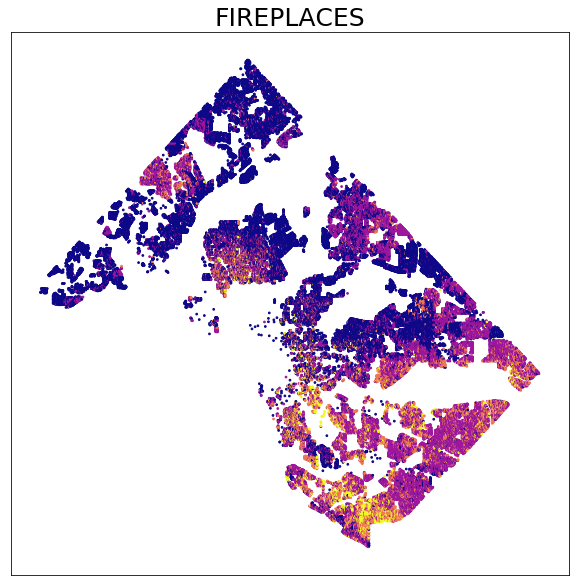

In [197]:
def scatter_categorical_map(df_raw,variable,title,factor):
    # Drop all other variables than the one of interest to save computation in rounding
    df_rounded = df_raw.loc[:,[variable,'LATITUDE','LONGITUDE']].dropna().copy()
    
    # Round the coordinates to the bin size requested
    df_rounded.loc[:,['LATITUDE','LONGITUDE']] = df_raw.loc[:,['LATITUDE','LONGITUDE']].round(factor).copy()
    
    df_tmp  = df_rounded.copy()
    var_by_loc = df_tmp.groupby(['LATITUDE','LONGITUDE']).agg(lambda x:x.value_counts().index[0]).loc[:,variable]
    var_by_loc_99 = var_by_loc[var_by_loc<np.quantile(var_by_loc.dropna(),0.99)]
    plt.figure(figsize=(10,10))
    plt.scatter(var_by_loc_99.index.get_level_values('LATITUDE'),
                var_by_loc_99.index.get_level_values('LONGITUDE'),
                c=var_by_loc_99,
               s=3,cmap='plasma')
    plt.title(title,fontsize=25)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
scatter_categorical_map(df,'FIREPLACES','FIREPLACES',4)

In [39]:
def bin_number(dataframe, n_bins):
    min_x,max_x = dataframe.loc[:,'LATITUDE'].min(),dataframe.loc[:,'LATITUDE'].max()
    min_y,max_y = dataframe.loc[:,'LONGITUDE'].min(),dataframe.loc[:,'LONGITUDE'].max()
    x_bins = np.linspace(min_x,max_x,n_bins)
    y_bins = np.linspace(min_y,max_y,n_bins)
    return x_bins,y_bins
#     plt.hist2d(df_clean.LATITUDE,df_clean.LONGITUDE,bins=[n_bins,n_bins])
#     plt.show()
    
x_bins,y_bins = bin_number(df_clean,50)

In [252]:
def aggregate_census(dataframe, 
                     constraint_variable, constraint, 
                     aggregate, factor, 
                     group_vars = ['LATITUDE','LONGITUDE']):
    '''
    dataframe: 
        Must include 'LATITUDE' & 'LONGITUDE' & 'PRICE'
    constraint_variable:
        The variable to constrain, for example 'BEDRM'
    constraint: 
        lambda function to constrain above variable with
        example: (lambda x: x == 3)
    aggregate:
        lambda function to aggregate with
        example: (lambda x: np.mean(x))
    factor: 
        number of significant digits
        example: 3
    group_vars:
        aggregation variable (if none, then LATITUDE & LONGITUDE)
        if ['CENSUS_TRACT']: then shapefiles
    '''
    # Drop all other variables than the one of interest to save computation in rounding
    df_vars = list(set([constraint_variable,'PRICE','LATITUDE','LONGITUDE'] + group_vars))
    df_sub = dataframe.loc[:,df_vars].copy()
    
    # Constrain
    df_sub = df_sub.loc[constraint(df_sub.loc[:,constraint_variable])]    
    
    # Bin by location and aggregate with function
    agg_df = df_sub.groupby(group_vars,as_index=False).agg(aggregate).loc[:,[constraint_variable,'PRICE'] + group_vars]
    
    joined_df = pd.merge(agg_df,df_geo,on='CENSUS_TRACT').dropna()
    return joined_df

In [290]:
def aggregate_census(dataframe, constraint_variable, constraint, aggregate):
    
    df_sub = dataframe.loc[:,[constraint_variable,'PRICE','CENSUS_TRACT']].copy()
    df_sub = df_sub.loc[constraint(df_sub.loc[:,constraint_variable])]
    agg_df = df_sub.groupby('CENSUS_TRACT',as_index=False).agg(aggregate)
    return pd.merge(agg_df,df_geo,on='CENSUS_TRACT')

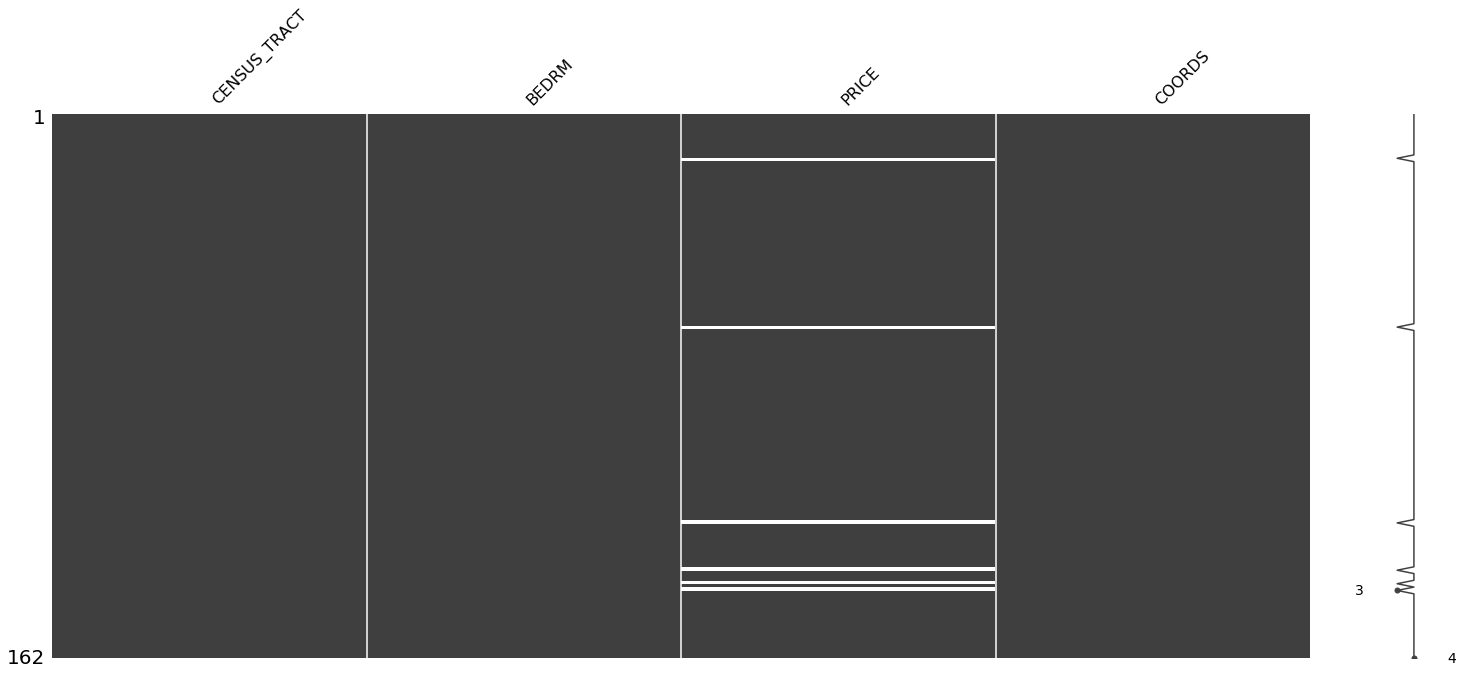

In [301]:
from missingno import matrix
matrix(aggregate_census(df_clean, c_var, constr_3, agg_1))

In [320]:
# Price map for specific number of bedrooms/rooms
# Mean, median, most common, min/max?
def price_map_with_constraints(dataframe, 
                               constraint_variable, constraint, 
                               aggregate, factor, 
                               group_vars = ['LATITUDE','LONGITUDE']):
    
    
    joined_df = aggregate_census(dataframe, constraint_variable, constraint, aggregate).dropna()
    
    price_low = 0
    price_high = np.percentile(joined_df.PRICE,99)
    c_values = joined_df.PRICE/price_high
    
    
    f,ax = plt.subplots(1,2, figsize=(12,6))
    
    ax[1].hist(joined_df.loc[joined_df.PRICE < price_high,'PRICE'],bins=100)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    print(c_values)
    # Get corresponding colors from map
    color_sq = [plt.cm.get_cmap('coolwarm')(x) for x in c_values]

    pass
    for color,district in zip(color_sq,joined_df.iterrows()):
        # Plot outlines
        x_lon = np.array(district[1].COORDS)[:,0]
        y_lat = np.array(district[1].COORDS)[:,1]

        c_val = 'black'

        ax[0].fill(x_lon,y_lat, color=color)
        ax[0].plot(x_lon,y_lat, color='black',lw=0.5)

#     sm = plt.cm.ScalarMappable(cmap='coolwarm',norm=plt.Normalize(vmin=0,vmax=price_high))
#     cbar = plt.colorbar(sm, ticks=np.arange(0,price_high,250_000), orientation="horizontal",ax=ax[0])
    
    plt.show()
    

    return joined_df

0      0.329960
1      0.300427
2      0.227812
3      0.285803
4      0.224123
         ...   
168    0.221344
169    0.230886
170    0.033514
171    0.136722
172    0.090009
Name: PRICE, Length: 173, dtype: float64


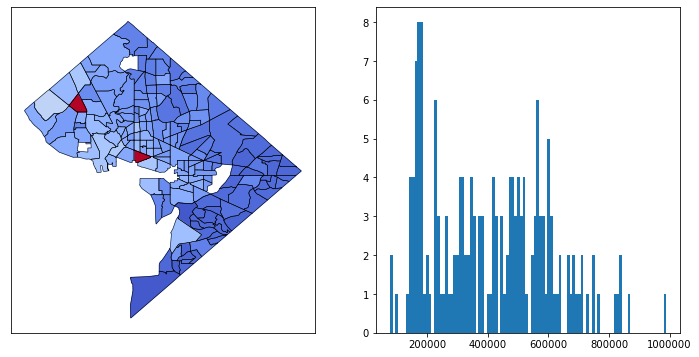

In [321]:
# Constrained variable
c_var = 'BEDRM'

# Constraint function

constr_1 = (lambda x: x == 2)
constr_2 = (lambda x: x == 3)
constr_3 = (lambda x: x == 5)
constr_true = (lambda x: x > 0)

# Mean, median, most_common
agg_1 = (lambda x: np.mean(x))
agg_2 = (lambda x: np.median(x))
agg_3 = (lambda x: x.value_counts().index[0])

# groupby_vars 
grp_vars = ['LATITUDE','LONGITUDE']
grp_vars = ['CENSUS_TRACT']

# Out

var_by_loc = price_map_with_constraints(df_clean, c_var, constr_1, agg_1, 3, grp_vars)

In [307]:
var_by_loc

,CENSUS_TRACT,BEDRM,PRICE,COORDS
0,100.0,2.0,825797.891688,"[(-77.06474566621758, 38.91916571557175), (-77..."
1,202.0,2.0,751885.747222,"[(-77.06567930445408, 38.9118267867754), (-77...."
2,300.0,2.0,570149.834395,"[(-77.08071730983949, 38.92255778926985), (-77..."
3,400.0,2.0,715284.706667,"[(-77.06638630596933, 38.927534790518926), (-7..."
4,501.0,2.0,560916.977011,"[(-77.05062730194597, 38.93323779188842), (-77..."
...,...,...,...,...
168,10600.0,2.0,553961.902703,"[(-76.99496328229789, 38.9013337880061), (-76...."
169,10700.0,2.0,577843.000000,"[(-77.0416782978997, 38.90903778752755), (-77...."
170,10900.0,2.0,83875.000000,"[(-77.00600428070105, 38.82409877139591), (-77..."
171,11000.0,2.0,342177.886364,"[(-77.01674828757126, 38.8764677816625), (-77...."


In [186]:
d = {ind:val for ind,val in zip(geo_prices.index,geo_prices.values)}
h = geo_prices.index.values

map_with_color_values(df_geo,d,cmap)

NameError: name 'geo_prices' is not defined

In [ ]:
df_geo.TRACT

In [130]:
for col in df_geo:
    print(col, len(df_geo.loc[:,col].unique()))

OBJECTID 179
TRACT 179
GEOID 179
P0010001 172
P0010002 175
P0010003 161
P0010004 176
P0010005 35
P0010006 119
P0010007 12
P0010008 113
OP000001 81
OP000002 49
OP000003 77
OP000004 23
P0020002 153
P0020005 158
P0020006 178
P0020007 23
P0020008 119
P0020009 9
P0020010 27
OP00005 71
OP00006 46
OP00007 69
OP00008 16
P0030001 177
P0030003 159
P0030004 172
P0030005 31
P0030006 113
P0030007 11
P0030008 107
OP00009 65
OP00010 45
OP00011 63
OP00012 20
P0040002 143
P0040005 157
P0040006 173
P0040007 18
P0040008 115
P0040009 8
P0040010 22
OP000013 55
OP000014 40
OP000015 59
OP000016 15
H0010001 176
H0010002 175
H0010003 133
ACRES 179
SQ_MILES 179
Shape_Leng 179
Shape_Area 179
FAGI_TOTAL 179
FAGI_MEDIA 179
FAGI_TOT_1 179
FAGI_MED_1 179
FAGI_TOT_2 178
FAGI_MED_2 178
FAGI_TOT_3 179
FAGI_MED_3 178
FAGI_TOT_4 179
FAGI_MED_4 179
FAGI_TOT_5 179
FAGI_MED_5 179


TypeError: unhashable type: 'list'

In [129]:
df_geo

,OBJECTID,TRACT,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,OP000001,OP000002,OP000003,OP000004,P0020002,P0020005,P0020006,P0020007,P0020008,P0020009,P0020010,OP00005,OP00006,OP00007,OP00008,P0030001,P0030003,P0030004,P0030005,P0030006,P0030007,P0030008,OP00009,OP00010,OP00011,OP00012,P0040002,P0040005,P0040006,P0040007,P0040008,P0040009,P0040010,OP000013,OP000014,OP000015,OP000016,H0010001,H0010002,H0010003,ACRES,SQ_MILES,Shape_Leng,Shape_Area,FAGI_TOTAL,FAGI_MEDIA,FAGI_TOT_1,FAGI_MED_1,FAGI_TOT_2,FAGI_MED_2,FAGI_TOT_3,FAGI_MED_3,FAGI_TOT_4,FAGI_MED_4,FAGI_TOT_5,FAGI_MED_5,coords
0,1,003400,11001003400,4347,4152,576,3392,20,97,3,64,157,66,45,8,239,528,3295,8,90,3,16,143,61,40,5,3997,538,3129,15,86,3,53,140,59,40,8,200,500,3043,8,79,3,14,129,55,35,5,1347,1025,322,266.264201,0.416038,4800.865939,1.077533e+06,5.334407e+07,39287.0,75037699.0,43117.0,59287920.0,38099.0,70436558.0,40413.0,79636907.0,42596.0,9.209657e+07,46152.0,"[(-77.01726629101556, 38.92801579236496), (-77..."
1,2,003500,11001003500,3740,3594,626,2681,14,106,0,167,91,26,28,8,371,530,2620,11,106,0,7,70,24,25,7,3398,581,2444,13,104,0,131,85,26,23,8,292,508,2387,10,104,0,7,70,24,20,7,1189,964,225,94.352383,0.147426,2982.473558,3.818306e+05,4.645466e+07,30673.5,66239783.0,32859.5,55914150.0,30555.5,60909648.0,32885.0,78873551.0,40450.0,9.754957e+07,44843.0,"[(-77.02204829144942, 38.92088579090426), (-77..."
2,3,003600,11001003600,4208,4048,1773,1645,13,161,0,456,58,39,44,11,809,1521,1604,8,158,0,14,49,20,41,9,3680,1691,1378,11,149,0,324,50,31,35,10,616,1473,1346,7,146,0,11,44,19,32,8,2308,1987,321,75.521648,0.118003,2293.465280,3.056253e+05,1.106218e+08,35858.0,161376203.0,42788.5,147954698.0,40355.0,153247476.0,40692.0,143081526.0,41616.0,1.780404e+08,46806.0,"[(-77.02704829373977, 38.92675679117782), (-77..."
3,4,003700,11001003700,5763,5507,1915,2527,22,212,10,821,134,60,55,15,1514,1490,2405,13,206,7,16,65,34,45,7,4798,1782,1988,17,193,9,605,106,50,49,10,1125,1450,1906,9,188,6,15,55,26,41,7,2570,2401,169,72.231863,0.112862,2297.040644,2.923120e+05,1.039060e+08,32263.0,162058134.0,41387.5,126923023.0,35705.5,143596631.0,38248.0,140501730.0,39131.0,1.816520e+08,45690.5,"[(-77.0324248577522, 38.92656688628895), (-77...."
4,5,003800,11001003800,4614,4419,2884,825,22,261,1,426,77,37,78,7,935,2456,796,10,257,1,26,59,27,68,3,4177,2726,729,18,240,1,313,53,35,64,6,738,2364,705,8,236,1,22,39,26,55,2,2861,2625,236,87.921652,0.137378,2708.295074,3.558063e+05,1.559601e+08,48799.0,209040361.0,54786.0,196678623.0,52077.0,213601983.0,54908.0,213544242.0,56380.0,2.356193e+08,60561.0,"[(-77.04154529694695, 38.916837788950055), (-7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,009507,11001009507,1489,1460,53,1304,11,1,0,91,22,10,4,4,156,16,1292,2,1,0,1,21,9,4,4,1209,38,1075,10,1,0,64,15,10,4,1,110,14,1067,2,1,0,1,14,9,4,1,607,583,24,72.812927,0.113770,2483.115055,2.946635e+05,3.500882e+07,38577.5,37021683.0,38410.0,34437488.0,36996.0,36555449.0,39274.0,39838674.0,38723.0,4.183457e+07,39851.0,"[(-76.99184428396863, 38.957414799347696), (-7..."
175,176,009508,11001009508,3290,3240,257,2821,11,30,0,121,38,24,11,2,235,182,2793,6,29,0,3,36,22,11,1,2785,227,2394,7,27,0,90,30,22,7,2,171,170,2376,5,26,0,3,28,20,7,1,1742,1578,164,231.917987,0.362372,5772.875428,9.385388e+05,6.731511e+07,38902.0,74438513.8,36844.0,70488991.0,37979.0,74847040.0,37529.0,76756174.0,38133.5,8.217265e+07,38670.5,"[(-76.99438228508221, 38.95728179934424), (-76..."
176,177,009509,11001009509,2940,2888,165,2592,5,33,0,93,48,7,14,3,169,124,2565,2,33,0,13,33,4,8,3,2400,142,2126,4,30,0,66,29,6,10,3,116,112,2114,2,30,0,5,20,4,7,3,1320,1258,62,159.553962,0.249303,3306.197043,6.456920e+05,7.555693e+07,44708.0,83396856.4,45890.0,78005645.0,45617.5,80688